# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Sep 24 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Jeet Jivrajani </font>

# Introduction

The objective of the assignment is to get familiar with Linear Modeling by the concept of **Linear Regression** and refreshing the **Object Oriented Concepts** by using its methods from the given code.The assignments also delas with finding the relation between the dependent and independent variables by implementing the linear regression using **Least Square and Least Mean Square method.** Also, analyzing the data and its visualizations. At the end comparing the outcomes of the two methods and inferring the results based on the observation. At last, you will get in depth understaning of the key terms like **Error Function, RMSE, Weights, alpha parameter, and feature matrix.**

# Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the regression data that you examined in Assignment #0. 

**Data-description**
<Br>This hourly data set contains the PM2.5 data of US Embassy in Beijing. PM means **Particulate Matter** that have diameter about 2.5 micrometers. PM2.5 is the air quality data which needs to be moitored. The data is obtained from the environmental companies. The dataset has multivariate and time-series characteristics. it contains 43824 instances of data with 13 attributes. It also contains missing values. The data was collected in between january 1, 2010 to December 31, 2014[1].
    
<Br>No: row number
<Br>year: year of data in this row
<Br>month: month of data in this row
<Br>day: day of data in this row
<Br>hour: hour of data in this row
<Br>pm2.5: PM2.5 concentration (ug/m^3)
<Br>DEWP: Dew Point (â„ƒ)
<Br>TEMP: Temperature (â„ƒ)
<Br>PRES: Pressure (hPa)
<Br>cbwd: Combined wind direction
<Br>Iws: Cumulated wind speed (m/s)
<Br>Is: Cumulated hours of snow
<Br>Ir: Cumulated hours of rain

**Source**
<Br>1. Song Xi Chen, csx '@' gsm.pku.edu.cn, Guanghua School of Management, Center for Statistical Science, Peking University.



In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

df_regression= pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')
df_regression.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


**Visualization of data**
<Br>There are different kind of visualization techniques for visualizing the data like scatter plot, heatmap, bar plot, histogram plot and many more.
<Br> Initially, I have plotted the graph of all the features with the number of instances. Then generated the graphs of the all the features with all the other features by using the pairplot to check which features are more corelated and which features are uncorelated. Further generated the heatmap to quantify the corelation of the pairplots.

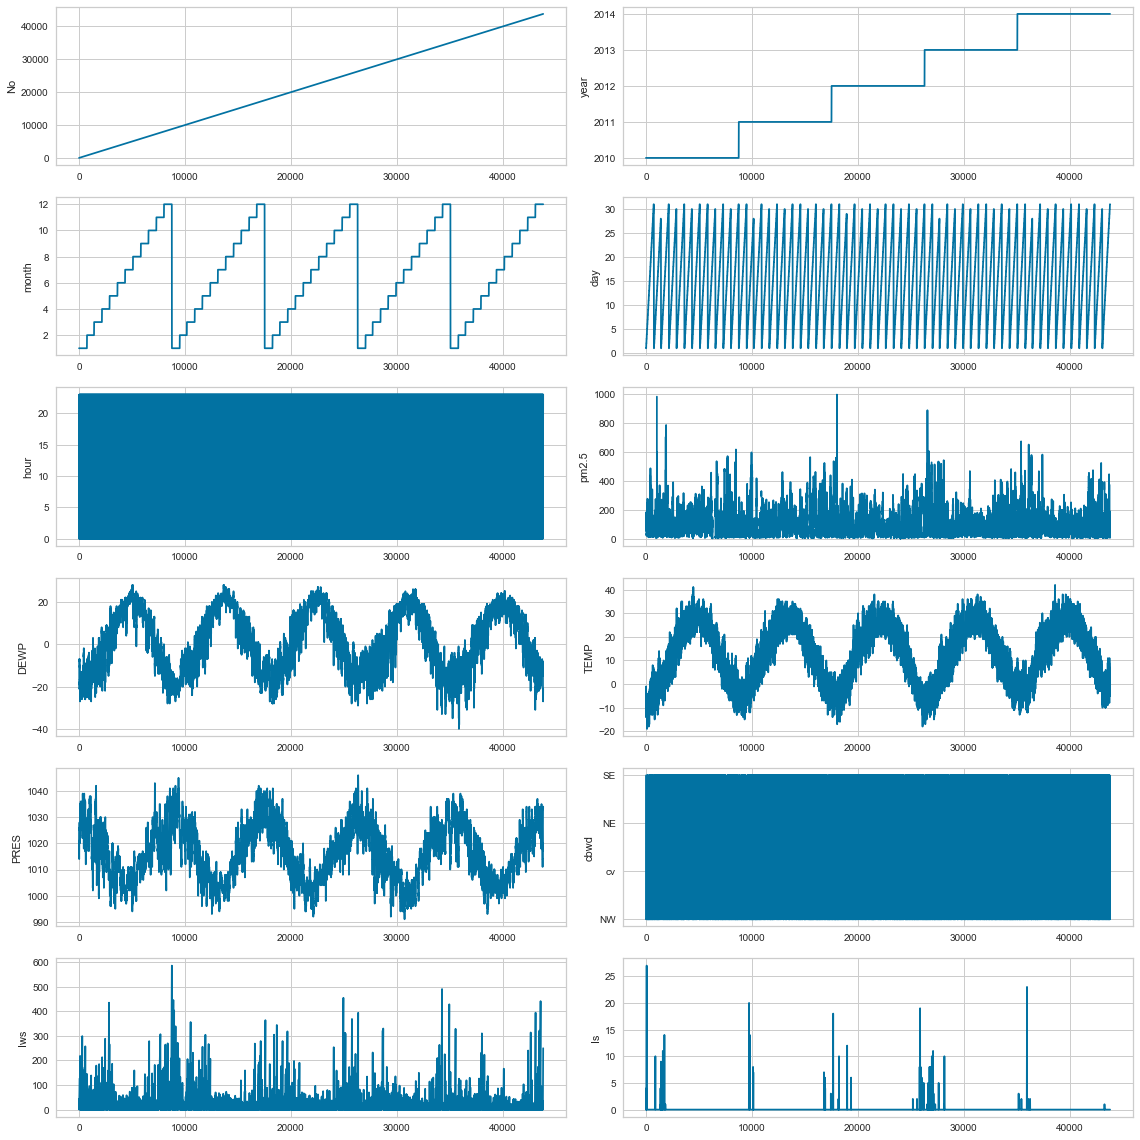

In [269]:
X = df_regression.iloc[:, :]
fig = plt.figure(figsize=(16,16))
plt.title("Plots of all features vs samples")
plt.clf()
for i in range(12):
    plt.subplot(6, 2, i+1)
    plt.plot(X.iloc[:, i])
    plt.ylabel(X.columns.values[i])
fig.tight_layout()

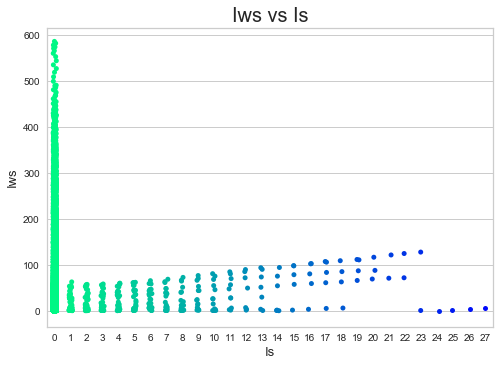

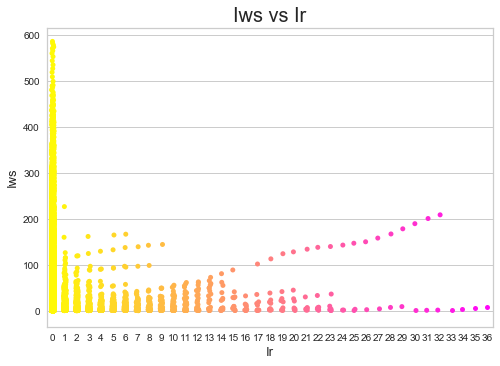

In [270]:
sns.stripplot(df_regression['Is'], df_regression['Iws'], palette = 'winter_r')
plt.title('Iws vs Is', fontsize = 20)
plt.xlabel('Is', fontsize = 13)
plt.ylabel('Iws', fontsize = 13)

plt.show()
sns.stripplot(df_regression['Ir'], df_regression['Iws'], palette = 'spring_r')
plt.title('Iws vs Ir', fontsize = 20)
plt.xlabel('Ir', fontsize = 13)
plt.ylabel('Iws', fontsize = 13)

plt.show()

<h3>Pairplot creates a grid of axes in which every variable in data in y-axis is mapped with the every other variable in x axis. The diagonal plots are generated in which both x and y axis share the same variable[2].</h3>


c:\users\asus\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\asus\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


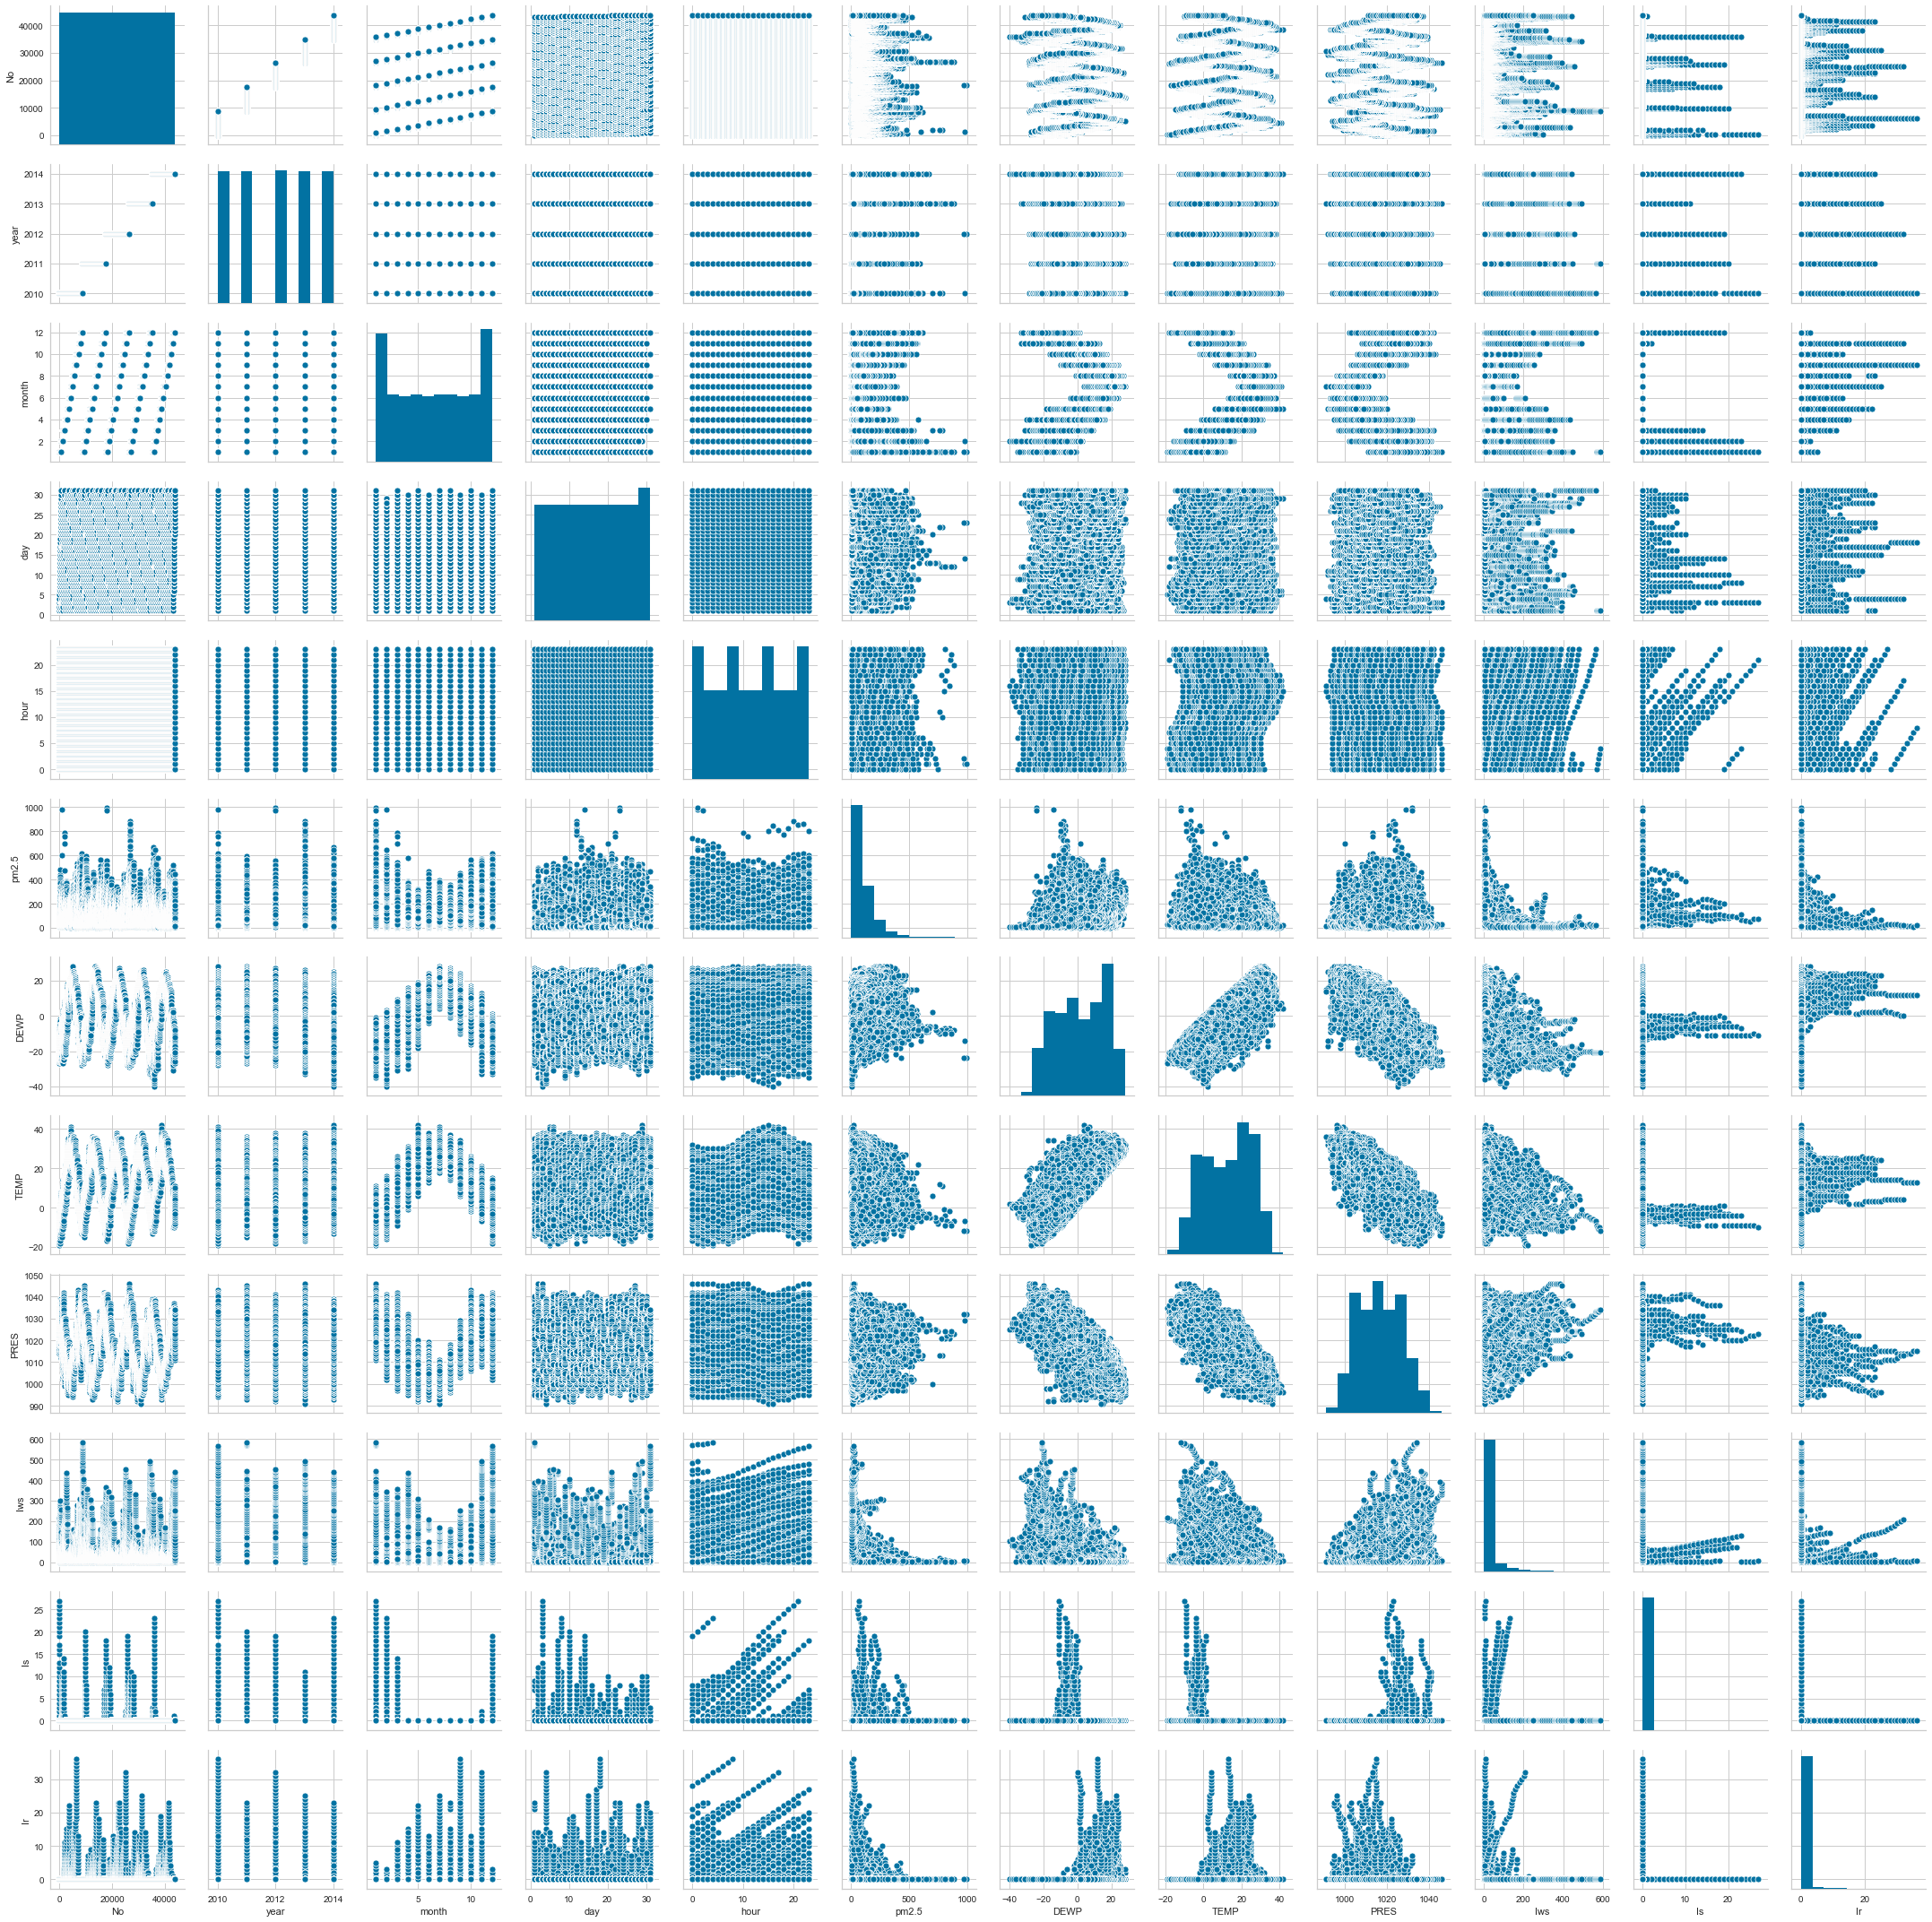

In [271]:
sns.pairplot(df_regression, palette='coolwarm')

<h3>Heatmap helps data which depends on two independent variables as a color coded image plot[3].</h3>

Text(0.5, 1.0, 'Heatmap for the Features')

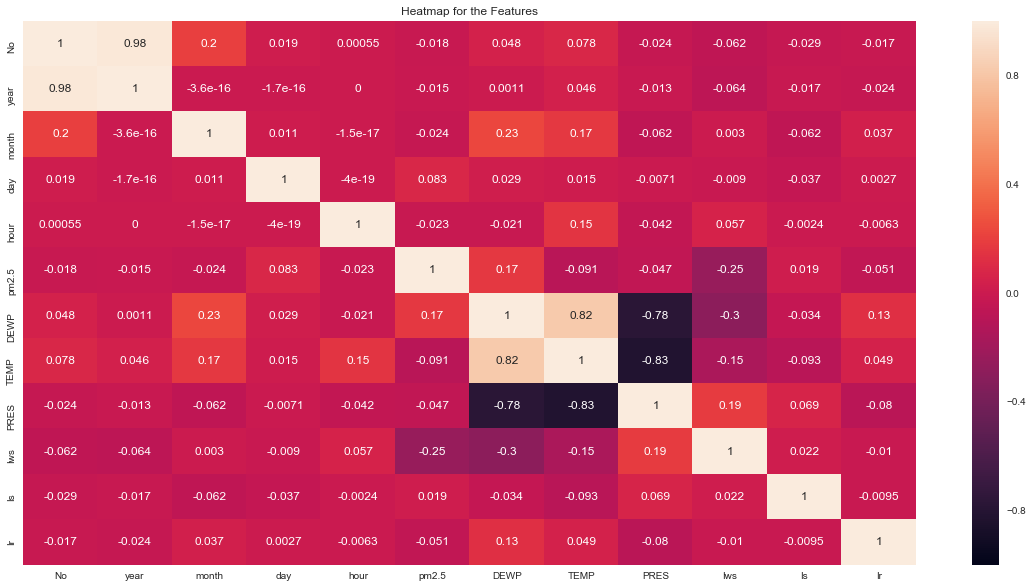

In [272]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(df_regression.corr(),vmin=-1,vmax=1,annot=True)
plt.title("Heatmap for the Features")

**Preliminary Observation**

1. Dew point and Temperature are highly correlated data.
2. Dew Point and Pressure are less correlated data. So we can say that when both the attributes are high then the chances of occuring the event is less.
3. In beginning due to snow fall there is more amount of wind blowing where as in the end when there is no snow cumulative wind speed also decreases.
4. In beginning due to  heavy rain there is more amount of wind blowing where as there is a little different trend in the end. As seen in above point, there is no snow so wind is less but with respect to rain there some wind blown though there is no rain.
5. Here from the first graph of subplots we can find that the feature such as **"No, year, month, day, hour and cbwd"** has no influence on the prediction of the **pm2.5** values so we can erradicate that features in the preprocessing part.

### Data - Preprocessing of the data
<Br>1. Count the data and display the missing values    
<Br>Since the data contains the missing values it needs to be handled just by replacing the missing values with Mean or value by applying some mathematical operations or just remove the entire data of the row.       
<Br>2. Drop NaN values and obtain the remaining values. Initially data consists of 43824 values, after NaN values the size of data is 41757 instances and 13 features

In [275]:
df_regression.isnull().sum()
df_regression=df_regression.dropna()
df_regression.describe()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866
std,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000


Here the  feature **"No"** is just the row number, **"year, month, day, and hour"** are time information that are not used for analysis. **"cbwd"** is just the feature of the wind direction which is not involved in any kind of predictions. By removing this fetures makes the visualizing task easy to find the trend and relation between the other attributes

In [274]:
df_regression = df_regression.drop('No',axis=1)
df_regression = df_regression.drop('year',axis=1)
df_regression = df_regression.drop('month',axis=1)
df_regression = df_regression.drop('day',axis=1)
df_regression = df_regression.drop('hour',axis=1)
df_regression = df_regression.drop('cbwd',axis=1)
df_regression.head()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
0,NaN,-21,-11.0,1021.0,1.79,0,0
1,NaN,-21,-12.0,1020.0,4.92,0,0
2,NaN,-21,-11.0,1019.0,6.71,0,0
3,NaN,-21,-14.0,1019.0,9.84,0,0
4,NaN,-20,-12.0,1018.0,12.97,0,0


# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description
 
 
 **Explanation of Super Class Definition**
 
 <Br>Base Model is the super class in which there are two abstract methods train and use which are used to implement the **Least square** and **Least Mean Square.** Further, LinearModel is a class which inherits the properties and methods of the parent class Base Model by passing **Base Model** class as a parameter of a **LinearModel** class. LinearModel class contains a constructor which has **weight** variable which is assigned None initially. Further it also has other two methods called **check_matrix and add_ones** and 2 abstract methods name **train and use** of its parent class. Method check_matrix checks if the matrix shape is 2D matrix or not. If the matrix is not a 2D then it throws error and we need to handle it by adding a bias term or by transposing the matrix whichever is suitable according to the condition. Method add_ones is used to add a bias term in the matrix. Train and use method is defined without implementing the logic of the abstract functions.
 


### Super Class Definition

In [273]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 


 # Review- Least-Squares
When the data is linear or when we need simple solution, the linear model can suggest better solutions. 
For instance, one dimensional affine model can be written as

$$
f(x; a, b) = a x + b.
$$

   Considering multiple inputs for x, we can extend the input x to input vector **x** with dummy input $x_0 = 1$:

$$
\begin{align}
f(\textbf{x}; \textbf{w}) &=  w_D x_D + \cdots + w_1 x_1 + w_0 \\
            &= \sum_{i=0}^{D} w_i x_i \quad\text{where } x_0 = 1\\
            &= \textbf{w}^\top \textbf{x}.
\end{align}
$$

Now, for minimizing the error we should look at the difference between the predicted value and the original value. Here it is represented as the sum of squares which is called **Error function(E)**:
\begin{align}
E(\textbf{w}) &= \sum_{i=1}^N \Big(f(\textbf{x}_i; \textbf{w}_i) - t_i \Big)^2 \\
            \\ 
\end{align}
                                    Here,
                                   <br> x = instances of feature matrix
                                   <br> w = weights
                                   <br> t = target value
                                   
<Br> For minimizing the cost the error must be as least as possible. So for minimizing the error fucntion you need to perform the derivate of the cost function by setting the equation equals to zero which gives the following equation: 
    $$
\begin{align}
\textbf{w} &= \big(\textbf{X}^\top \textbf{X}\big)^{-1} \textbf{X}^\top \textbf{t}
\end{align}
$$

<Br> From the above discussion of the **Least square method** it can be infered that it takes all the data in training so it can computaionaly **too expensive** when we think about the larger dataset. This method is known as **Batch learning.**

 # Implementation- Least-Squares 
 
 <Br> - The implementation of the **Least Squares** method contains the class **LinearRegress** which  inherits **LinearModel** class. The constructor of the class calls its parent constructor and initially it initializes the weight to None. Further we need to update the variable **self.weight** as per our criteria.
    
   <br>- There are further two methods **Train and use.** **Train method is used for calculating the weight of the least square method and adding bias to the equation.** It accepts two parameters input features(X) and its target variables(T). The train function also returns the last updated weight. The **use method calculates the prediction based on the last updated weight and input features(X) by performing dot product between them.** At last use method returns the predictions i.e. the dot product for visualising purpose.**

In [283]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = super().add_ones(X)
        self.w = np.linalg.inv(X.T @ X) @ X.T @ T
        return self.w  ## TODO: replace this with your codes
    
    # apply the learned model to data X
    def use(self, X):
        X = super().add_ones(X)
        y = X@self.w
        return y  ## TODO: replace this with your codes

# Review- Least Mean Square
 <Br> To overcome the limitations of the Least squares method, there was a need of the online learning algorithm in which model is updated at every instance. Initially we need to initialize the random weights, after the first iteration there is an update of the parameters. 
    
Here $k$ represents the steps for the repetition,

$$
\textbf{w}^{(k+1)} = \textbf{w}^{(k)} - \alpha \nabla E_k 
$$

where $E_k$ is the error for the $k$'th sample and $\alpha$ is a learning rate. 
This is called **stochastic gradient descent.** The below equation can be derived by taking the derivate of $E_k$:
\begin{align}
E_k &= \sum_{i=1}^N \Big(f(\textbf{x}_i; \textbf{w}_i) - t_i \Big)^2 \\
            \\ 
\end{align}

$$
\begin{align}
\nabla E_k = 
        &= 2\Big( {\textbf{w}^{(k)}}^\top \textbf{x}_k - t_k \Big) \textbf{x}_k.
\end{align}
$$
This gives the following update rule for each sample:

$$
\textbf{w}^{(k+1)} = \textbf{w}^{(k)} - \alpha \Big( {\textbf{w}^{(k)}}^\top \textbf{x}_k - t_k \Big) \textbf{x}_k.
$$

 # Implementation- Least Mean Square
 
 <Br> - The implementation of the Least Mean Square method contains the class **LinearRegress** which  inherits **LinearModel** class. The constructor of the class calls its parent constructor and initially it initializes the weight to None. Further we need to update the variable **self.weight** as per our criteria. Additionally it has **self.alpha** parameter which is called learning rate is passed by calling the LMS method.
    
  <Br> - Similar to least square in addition to Train and use method, it also contains one more method called train_step. The functionality of Train and use method varies as there is batch training in LMS whereas there was no batch training in LS. Train method takes two parameters input features(X) and target variable(T). Train method is used for batch training it calls the train_step method. In train_step method same two parameters are passed, it checks if the weights are None or not,if weights are None then it initializes the weights with zero matrix of size of input feature. We can also initialize the random weights. According to the equation alpha gets multiplied and weights gets updated in every iteration. At last it returns the last updated weights. Similar to least square method, here use method return the predicted valu by multiplying input features with the updated weights.

In [284]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
        
  # batch training by using train_step function
    def train(self, X, T):    
        for i in range(X.shape[0]):
            self.train_step(X[i], T[i])
        return self.w
        
    def train_step(self, x, t):
        x = super().add_ones(np.reshape(x,(1,x.shape[0])))

        if self.w is None :
            self.w = np.zeros(x.shape[1]).reshape((1,-1))
            
        y = x @ self.w.T
        self.w = self.w - self.alpha * (y - t) * x
        return self.w
    
    # apply the current model to data X
    def use(self, X):
        X = super().add_ones(X)
        y = X@self.w.T
    
        return y  ## TODO: replace this with your codes
        

### Usage Examples

- This is just the usage example which verifies the correct implementation of methods by replicating the given graphs.

In [285]:
# HERE follow are for my code tests.
# 
import matplotlib.pyplot as plt
%matplotlib inline

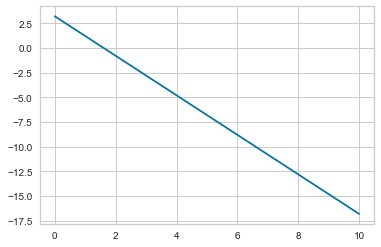

In [286]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2
ls = LinearRegress()

ls.train(X, T)
plt.plot(ls.use(X))

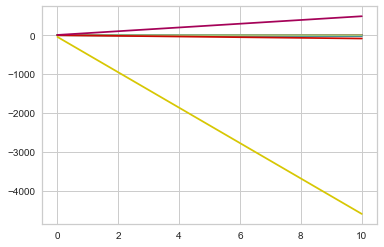

In [287]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

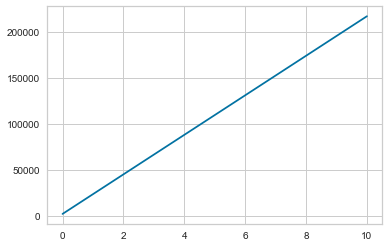

In [288]:
lms.train(X, T)
plt.plot(lms.use(X))

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [289]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


# Experiments
<Br>- The partition function takes three argument the input features, the target variable and the ratio of train test data. Basically, the ratio is for how much data you want in training as well as in testing set. Initially it checks if the sum of the ratio variable is equal to 1 or not, then all the data gets randomized by applying the permutation function of numpy library. The data is further mapped i.e. **0: training data and 1: testing data** both for the features and target variables which is done by the **enumerate** function in the code. At last it returnsfetures and labels with the different values mapped either 0 or 1. Then again the values are extracted from the features and target variables and divides in X_Train, X_est, y_train and y_test. In which training data is 80% and testing data is 20%.
    
<Br> - Initially divided the **Beijing PM2.5 Data Data Set** in two different dataframe of input features and target variable.
Further create an object of the **LinearRegress** class. Call the train method by passing two parameters i.e. input features and target. But this time you will pass the 80% training input data(X_train) and 80% of the training labels(y_train). After that use method is call to predict the valus of the testing data. At last the RMSE error is calculated for checking the error.
    
<Br> - Similarly in Least Mean Square we divide the dataframe in target and input feature, and call the LMS class. The only difference is LMS class takes the input parameter as alpha which is to be passed at the time of calling the function. At last RMSE error is calculated for checking the error.

<h2>Partitioning the data</h2>

In [290]:
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    idxs = np.random.permutation(X.index)
    
    N = X.shape[0]
    
    features = []
    labels = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            features.append(X.iloc[i:, :])
            labels.append(T.iloc[i:, :])
        else:
            features.append(X.iloc[i:i+nrows, :])
            labels.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return features, labels

<h2>Least Square Method</h2>


In [291]:
X_pm_data = df_regression.iloc[:,1:]
T_pm_label = df_regression.iloc[:,0:1]

split_feature, split_label = partition(X_pm_data, T_pm_label)
X_train, X_test = [i.values for i in split_feature]
y_train, y_test = [j.values for j in split_label]
print("Training data shape: ",X_train.shape,"\nTraining label shape: ",X_test.shape,"\nTesting data shape: ",y_train.shape,"\nTesting label shape:",y_test.shape)

Training data shape:  (33406, 6) 
Training label shape:  (8351, 6) 
Testing data shape:  (33406, 1) 
Testing label shape: (8351, 1)


In [292]:
ls = LinearRegress()
ls.train(X_train, y_train)
y= ls.use(X_test)

print("Least square rmse error:",np.sqrt(np.sum((y_test-y)**2)/X_test.shape[0]))

Least square rmse error: 84.56768876791502


<h2>Least Mean Square Method</h2>


In [293]:
X_pm_data = df_regression.iloc[:,1:]
T_pm_label = df_regression.iloc[:,0:1]

split_feature, split_label = partition(X_pm_data, T_pm_label)
X_train, y_train = [i.values for i in split_feature]
X_test, y_test = [j.values for j in split_label]
print("Training data shape: ",X_train.shape,"\nTraining label shape: ",X_test.shape,"\nTesting data shape: ",y_train.shape,"\nTesting label shape:",y_test.shape)

Training data shape:  (33406, 6) 
Training label shape:  (33406, 1) 
Testing data shape:  (8351, 6) 
Testing label shape: (8351, 1)


In [294]:
lms = LMS(0.01)

lms.train(X_train, X_test)
y = ls.use(y_train)
print("Least mean square rmse error:",np.sqrt(np.sum((y-y_test)**2)/X_test.shape[0]))

c:\users\asus\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in multiply
c:\users\asus\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in multiply
c:\users\asus\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in subtract


Least mean square rmse error: 42.28257860902843


<h2>Data Visualisation</h2>

<Br> The given plots are the visualisation of the predicted targets with repect to the actual target values. Here **Blue** colour is the actual target value whereas **Green** indicates the predicted target values. There is much deviation in the predicted values as compared to the default values. The error in Least Mean Square is comparatively half than Least Square error.

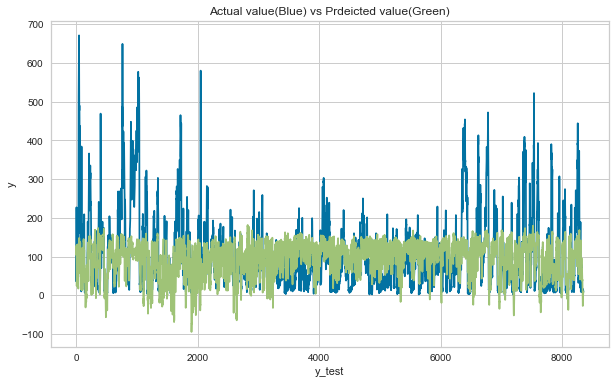

In [313]:
plt.figure(figsize = (10,6))
plt.ylabel('y')
plt.xlabel('y_test')
plt.title("Actual value(Blue) vs Prdeicted value(Green)")
plt.plot(y_test)
plt.plot(y)

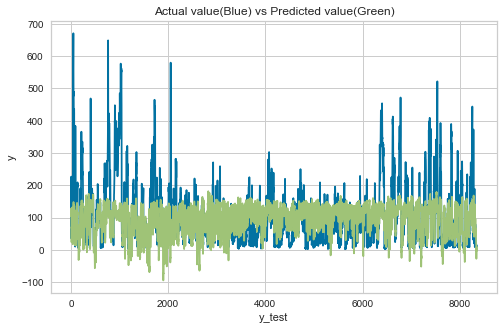

In [314]:
plt.figure(figsize = (8,5))
plt.ylabel('y')
plt.xlabel('y_test')
plt.title("Actual value(Blue) vs Predicted value(Green)")
plt.plot(y_test)
plt.plot(y)

<h2>Comparision/Analysis of Algorithms</h2>
    
<br> The major difference between the Least Square and Least Mean Square is **Least Square (LS)** require all the available data to train the model whereas **Least Mean Square(LMS)** is online learning algorithm it takes one sample in each iteration and fits the model according to the previous observation. While considering which is better than LS is suitable for some particular kind of dataset whereas LMS is optimal for all the datasets. Theoritically, LS is easy in understanding than LMS. From the learning it can be said that error obtained in the LS while testing would be more than the error in LMS. In "Beijing pm2.5 dataset" it is found that on analysis of both the methods after pre-processing the data Error obtained in LMS is nearly half than the error obtained in LS. From the visualisers point of view there is less dvation observed in the LMS as compared to LS. While implementing the LMS it was tough to figure out how to train the data in batch wise whereas it was simpler in the case of LS. As we know that the weights remain updated at every iteration than passing the updated weight to the prediction theoritically its eay rather than implementing it. Also, there is no learning rate(alpha) term in the LS so deciding the value of the alpha term also plays the major role in the LMS. By implementing the meshgrid with multiple values of alpha you can find the best optimum value from given set of values of alpha. At the end models are compared on the basis of the **goodness of the fit** by calculating the root mean square error. In further analysis, it can be said from the observation done in extra credit that if you remove the most correlated feature of the data than the error rises from **84 to 89.** Where as if you remove the least correlated fetuare there is almost no change in the error it is almost the same. Generally the RMSE error in **LS is 84 and 44 in LMS.**

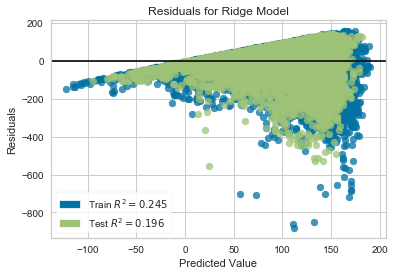

In [299]:
model = Ridge()
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, X_test)
visualizer.score(y_train, y_test)
visualizer.poof()

# Conclusions

<Br> Previous assignmnent helped to visualise the data by preprocessing the data, whereas this assignment followed the same but in addition to that it gave a glimpse about the supervised learning. The basic learning was to implement the Least square and Least Mean Square methods from scratch. Further, the challenging task was to write the code of LMS in train and train_step function. Initially there were the cases that where the error was less but still it was not able to pass the Preliminary test. So, learning to replicate the errors by writing our own function from scratch is a good motivation to start the assignment. It gave in depth understanding of both the methods of linear modelling. Extra one credit was also one of the motivation to complete the assignment first and then work for grabbing the 1 complete credit. Overally the outcome is we are good enough to go with any regression dataset for modeling the situation and infer the patterns and learnings from the situation. 

# References
1. Liang, X., Zou, T., Guo, B., Li, S., Zhang, H., Zhang, S., Huang, H. and Chen, S. X. (2015). Assessing Beijing's PM2.5 pollution: severity, weather impact, APEC and winter heating. Proceedings of the Royal Society A, 471, 20150257.
2. “Seaborn.pairplot.” Seaborn.pairplot - Seaborn 0.9.0 Documentation, https://seaborn.pydata.org/generated/seaborn.pairplot.html.
3. Creating Annotated Heatmaps.” Creating Annotated Heatmaps - Matplotlib 3.1.1 Documentation, https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html.
4. “Seaborn.stripplot.” Seaborn.stripplot - Seaborn 0.9.0 Documentation, https://seaborn.pydata.org/generated/seaborn.stripplot.html.
5. “Notebook on Nbviewer.” Jupyter Notebook Viewer, https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/Assign0.ipynb.


# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    
**Note: the extra credit is an additional work that needs complete programming, experiments, analysis, and writing to get one. **

**1. What is the most and least significant features for your data.**
- After pre-processing the data there are total 7 important features in the data. In which 1 feature is the target variable. So, out of 6 features in the data there are most and least important features for the regression model to fit. By looking at the analysis of the heatmap of those features it can be inffered that **pm2.5 vs DEWP(Dew point)** is the most important feature and **pm2.5 vs TEMP(Temperature)** is the least significant feature.



In [300]:
df_regression.describe()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866
std,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000


Text(0.5, 1.0, 'Heatmap for the Features')

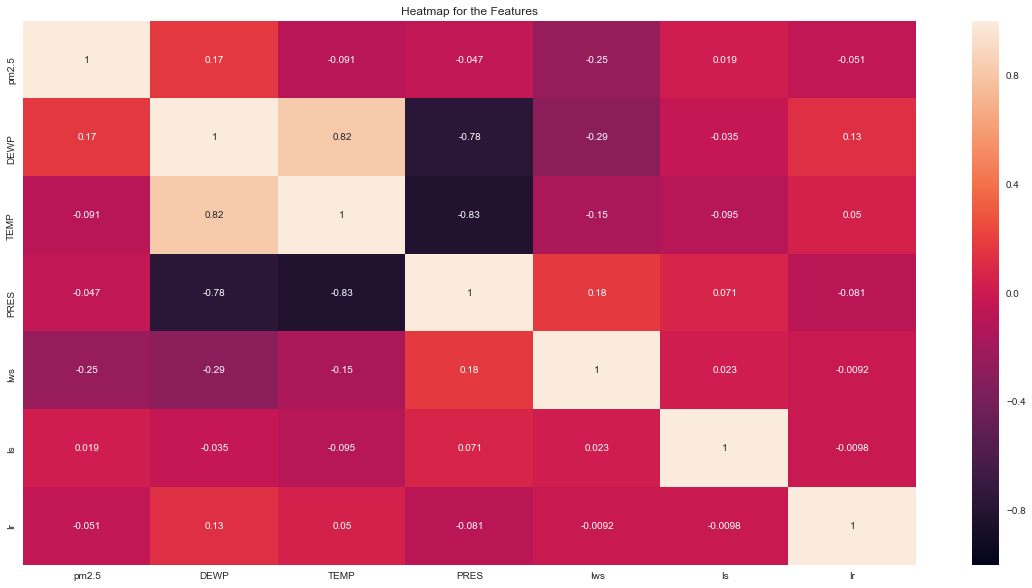

In [301]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(df_regression.corr(),vmin=-1,vmax=1,annot=True)
plt.title("Heatmap for the Features")

In [302]:
X_pm_Dewp = df_regression.iloc[:,1:2]
T_pm_Dewp_label = df_regression.iloc[:,0:1]

most_split_feature, most_split_label = partition(X_pm_Dewp, T_pm_Dewp_label)
X_train, y_train = [i.values for i in most_split_feature]
X_test, y_test = [j.values for j in most_split_label]
print("Training data shape: ",X_train.shape,"\nTraining label shape: ",X_test.shape,"\nTesting data shape: ",y_train.shape,"\nTesting label shape:",y_test.shape)

ls_most = LinearRegress()
ls_most.train(X_train, X_test)
y= ls_most.use(y_train)

Training data shape:  (33406, 1) 
Training label shape:  (33406, 1) 
Testing data shape:  (8351, 1) 
Testing label shape: (8351, 1)


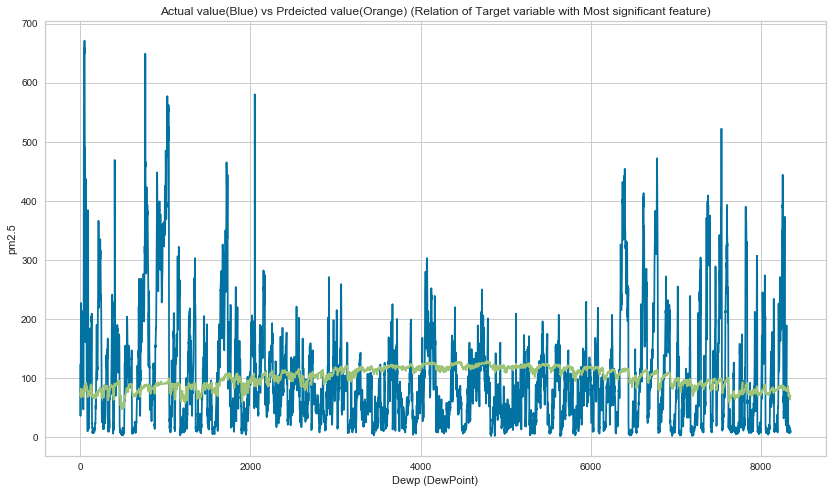

In [303]:
plt.figure(figsize = (14,8))
plt.ylabel('pm2.5')
plt.xlabel('Dewp (DewPoint)')
plt.title("Actual value(Blue) vs Prdeicted value(Green) (Relation of Target variable with Most significant feature)")
plt.plot(y_test)
plt.plot(y)

In [304]:
X_pm_Temp = df_regression.iloc[:,2:3]
T_pm_Temp_label = df_regression.iloc[:,0:1]

least_split_feature, least_split_label = partition(X_pm_Temp, T_pm_Temp_label)
X_train, y_train = [i.values for i in least_split_feature]
X_test, y_test = [j.values for j in least_split_label]
print("Training data shape: ",X_train.shape,"\nTraining label shape: ",X_test.shape,"\nTesting data shape: ",y_train.shape,"\nTesting label shape:",y_test.shape)

ls_least = LinearRegress()
ls_least.train(X_train, X_test)
y= ls_least.use(y_train)

Training data shape:  (33406, 1) 
Training label shape:  (33406, 1) 
Testing data shape:  (8351, 1) 
Testing label shape: (8351, 1)


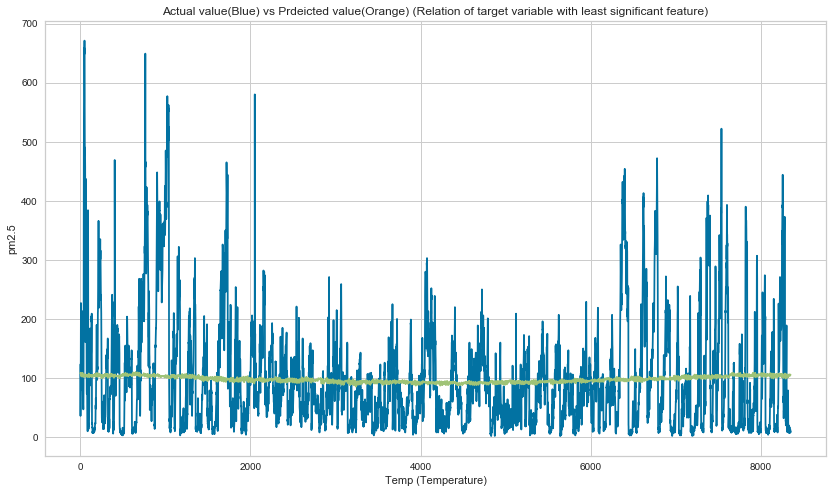

In [305]:
plt.figure(figsize = (14,8))
plt.ylabel('pm2.5')
plt.xlabel('Temp (Temperature)')
plt.title("Actual value(Blue) vs Prdeicted value(Green) (Relation of target variable with least significant feature)")
plt.plot(y_test)
plt.plot(y)

**2. What are the consequences if you remove those features from the model? (Show your work!)**

<Br> A. By removing the most significant feature from i.e. **DEWP (Dew Point)** from the dataset there is raise in the RMSE value. As we know that most significant feature in the dataset holds the importance by removing that feature results in increase in the error. Initially the RMSE error was **84.56** whereas after removing DEWP feature RMSE error dropped to **89.21.**
    
<Br> B. Similarly, By removing the least significant feature from i.e. **TEMP (Temperature)** from the dataset there is minimal change in the RMSE value. As we know that least significant feature in the dataset does not affect the prediction so either there is no change or negligible change in the error. Initially the RMSE error was **84.56** whereas after removing TEMP feature RMSE error dropped to **84.56.**

In [315]:
X_pm_remove_Dewp = df_regression.copy()
X_pm_remove_Dewp = X_pm_remove_Dewp.drop('DEWP',axis=1)
X_pm_remove_Dewp = X_pm_remove_Dewp.iloc[:,1:]
T_pm_remove_Dewp = df_regression.iloc[:,0:1]

remove_Dewp_split_feature, remove_Dewp_split_label = partition(X_pm_remove_Dewp, T_pm_remove_Dewp)
X_train, y_train = [i.values for i in remove_Dewp_split_feature]
X_test, y_test = [j.values for j in remove_Dewp_split_label]
print("Training data shape: ",X_train.shape,"\nTraining label shape: ",X_test.shape,"\nTesting data shape: ",y_train.shape,"\nTesting label shape:",y_test.shape)
print("rmse error after removing most significant feature:",np.sqrt(np.sum((y_test-y)**2)/y_train.shape[0]))
ls_remove_Dewp = LinearRegress()
ls_remove_Dewp.train(X_train, X_test)
y= ls_remove_Dewp.use(y_train)

Training data shape:  (33406, 5) 
Training label shape:  (33406, 1) 
Testing data shape:  (8351, 5) 
Testing label shape: (8351, 1)
rmse error after removing most significant feature: 84.56768876791502


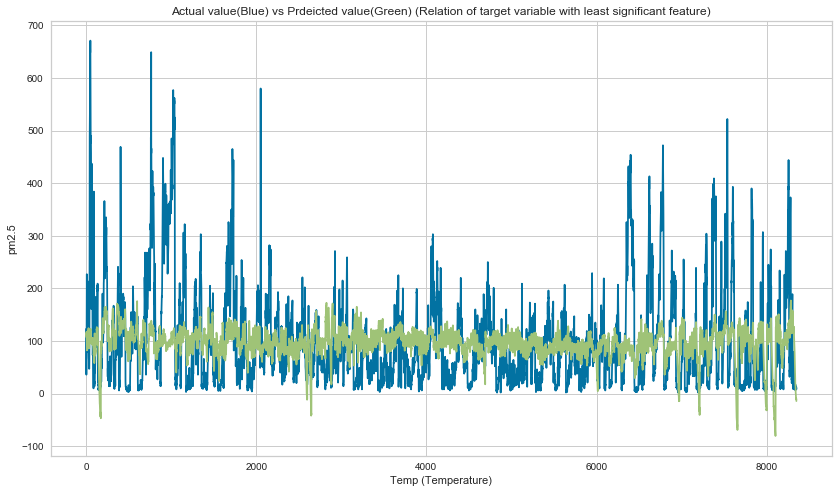

In [316]:
plt.figure(figsize = (14,8))
plt.ylabel('pm2.5')
plt.xlabel('Temp (Temperature)')
plt.title("Actual value(Blue) vs Prdeicted value(Green) (Relation of target variable with least significant feature)")
plt.plot(y_test)
plt.plot(y)

In [317]:
X_pm_remove_Temp = df_regression.copy()
X_pm_remove_Temp = X_pm_remove_Temp.drop('TEMP',axis=1)
X_pm_remove_Temp = df_regression.iloc[:,1:]
T_pm_remove_Temp = df_regression.iloc[:,0:1]

remove_Temp_split_feature, remove_Temp_split_label = partition(X_pm_remove_Temp, T_pm_remove_Temp)
X_train, y_train = [i.values for i in remove_Temp_split_feature]
X_test, y_test = [j.values for j in remove_Temp_split_label]
print("Training data shape: ",X_train.shape,"\nTraining label shape: ",X_test.shape,"\nTesting data shape: ",y_train.shape,"\nTesting label shape:",y_test.shape)
print("rmse error after removing least significant feature:",np.sqrt(np.sum((y_test-y)**2)/y_train.shape[0]))

ls_remove_Temp = LinearRegress()
ls_remove_Temp.train(X_train, X_test)
y = ls_remove_Temp.use(y_train)


Training data shape:  (33406, 6) 
Training label shape:  (33406, 1) 
Testing data shape:  (8351, 6) 
Testing label shape: (8351, 1)
rmse error after removing least significant feature: 89.21260702413474


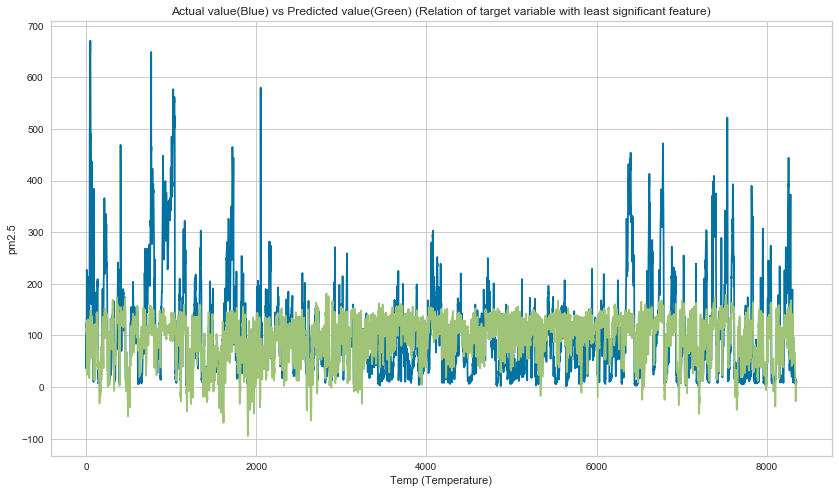

In [318]:
plt.figure(figsize = (14,8))
plt.ylabel('pm2.5')
plt.xlabel('Temp (Temperature)')
plt.title("Actual value(Blue) vs Predicted value(Green) (Relation of target variable with least significant feature)")
plt.plot(y_test)
plt.plot(y)

**3. Produce residual plots and observe the patterns for the goodness of fit**
<Br> The difference observed between the predicted and the actual value is called the residual. It shows the independent variable in the vertical axis whereas the dependent variable in the horizontal axis.

In [310]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

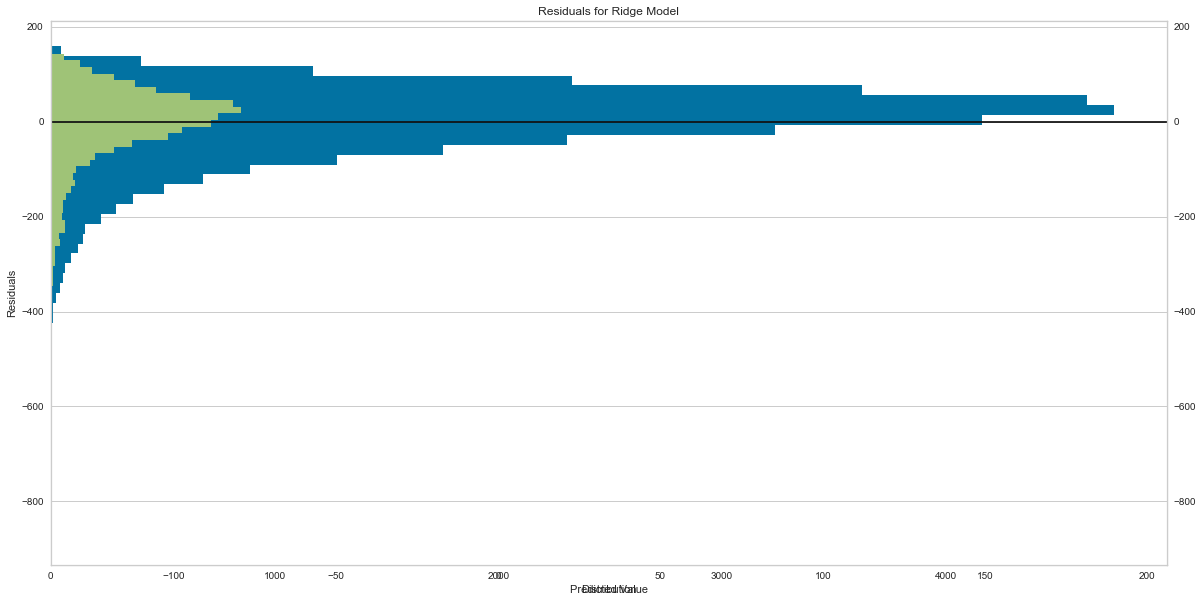

In [311]:
# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, X_test )  # Fit the training data to the visualizer
visualizer.score(y_train, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

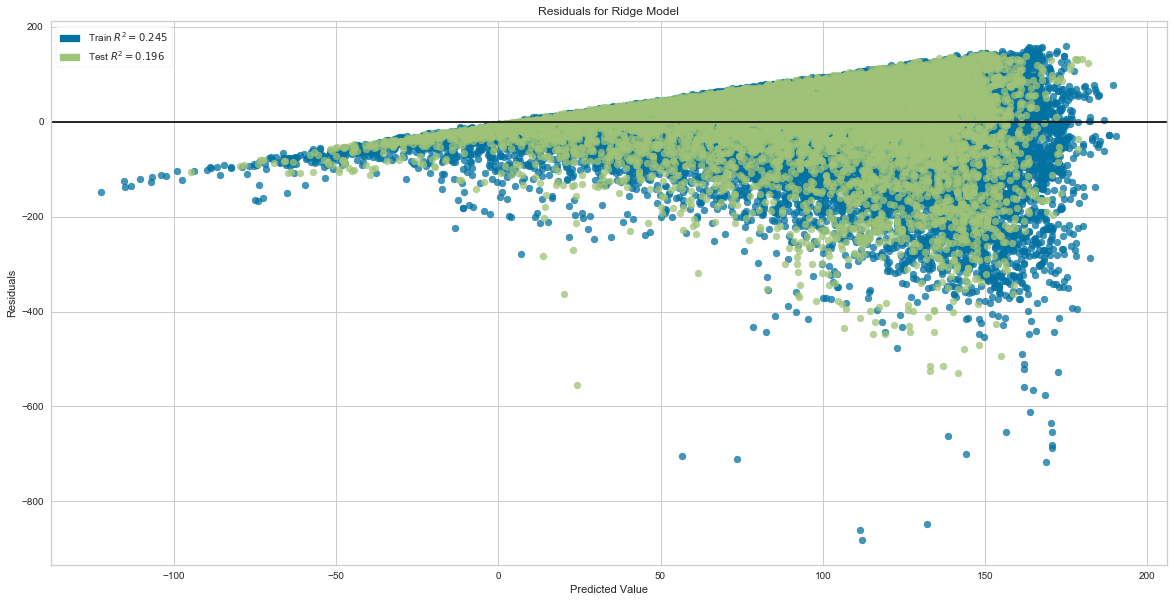

In [312]:
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, X_test)
visualizer.score(y_train, y_test)
visualizer.poof()

<h2>Analysis writing</h2>

<Br>- Initially the data is divide in two datafrmaes i.e. input feature and the target variable after removing the unwanted features and visualising through heatmap found the most and least correlated features. Now, again creating two different dataframe one without most corelated feature and other without the least coorelated feature. Then by calling the partition function dividing the data in 80-20 ratio for the training and testing purpose. Then, calculated the RMSE error by using the two method LS and LMS.
    
<Br>- The analysis shows that the most correlated feature in the data is **DEWP(Dew Point)** and the least correlated feature in the data is **TEMP(Temperature).** So if we remove the most coorelated feature from the data there is increase in the error whereas if you remove the least significant data there is almost no change in the error.

# Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 